In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [111]:
from function import function

### DATA UNDERSTANDING

In [112]:
## DATA UNDERSTANDING
raw_credit = pd.read_csv('credit_record.csv')
print(raw_credit.head())
print(raw_credit.shape,raw_credit.info())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
(1048575, 3) None


In [113]:
raw_application = pd.read_csv('application_record.csv')
print(raw_application.head())
print(raw_application.shape)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 


ID : Client number	

CODE_GENDER	: Gender	

FLAG_OWN_CAR : Is there a car	

FLAG_OWN_REALTY	: Is there a property	

CNT_CHILDREN : Number of children	

AMT_INCOME_TOTAL : Annual income

NAME_INCOME_TYPE : Income category	

NAME_EDUCATION_TYPE	: Education level	

NAME_FAMILY_STATUS	: Marital status	

NAME_HOUSING_TYPE	: Way of living	

DAYS_BIRTH	: Birthday	,Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED	: Start date of employment	,Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL	: Is there a mobile phone	

FLAG_WORK_PHONE	: Is there a work phone	

FLAG_PHONE	: Is there a phone	

FLAG_EMAIL	: Is there an email	

OCCUPATION_TYPE	: Occupation	

CNT_FAM_MEMBERS	: Family size	

MONTHS_BALANCE	: Record month	,The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

STATUS	: Status ,	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [114]:
raw_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [115]:
df = raw_application.merge(raw_credit, on='ID', how='inner')
print(df.shape)
print(df.sample(5))

(777715, 20)
             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
530820  5100307           M            Y               Y             2   
346752  5065801           F            N               Y             0   
259382  5052684           F            N               Y             0   
500347  5096192           M            N               N             0   
741198  5148595           M            Y               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
530820          405000.0  Commercial associate  Secondary / secondary special   
346752          135000.0             Pensioner  Secondary / secondary special   
259382           67500.0             Pensioner  Secondary / secondary special   
500347          360000.0  Commercial associate               Higher education   
741198          180000.0               Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRT

In [33]:
df = function.select_first_month(df)

In [34]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C
5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C
6,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0,-4,0
7,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0,0,0
8,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0,-1,0
9,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0,0


In [35]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,3.311000e+04,33110,33110,33110,33110.000000,3.311000e+04,33110,33110,33110,33110,33110.000000,33110.000000,33110.0,33110.000000,33110.000000,33110.000000,22737,33110.000000,33110.000000,33110
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,7
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,C
freq,NaN,22220,20618,22288,NaN,NaN,17077,22554,22725,29579,NaN,NaN,NaN,NaN,NaN,NaN,5601,NaN,NaN,17950
mean,5.078015e+06,NaN,NaN,NaN,0.427756,1.858772e+05,NaN,NaN,NaN,NaN,-16007.262489,60031.029085,1.0,0.224011,0.292419,0.090396,NaN,2.194654,-6.684929,NaN
std,4.187679e+04,NaN,NaN,NaN,0.741716,1.014124e+05,NaN,NaN,NaN,NaN,4213.387673,138345.184712,0.0,0.416936,0.454881,0.286752,NaN,0.911076,11.992018,NaN
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-60.000000,NaN
25%,5.041983e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19495.000000,-3159.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-9.000000,NaN
50%,5.069441e+06,NaN,NaN,NaN,0.000000,1.575000e+05,NaN,NaN,NaN,NaN,-15646.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,NaN
75%,5.114633e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12461.000000,-405.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33110 entries, 0 to 33109
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   33110 non-null  int64  
 1   CODE_GENDER          33110 non-null  object 
 2   FLAG_OWN_CAR         33110 non-null  object 
 3   FLAG_OWN_REALTY      33110 non-null  object 
 4   CNT_CHILDREN         33110 non-null  int64  
 5   AMT_INCOME_TOTAL     33110 non-null  float64
 6   NAME_INCOME_TYPE     33110 non-null  object 
 7   NAME_EDUCATION_TYPE  33110 non-null  object 
 8   NAME_FAMILY_STATUS   33110 non-null  object 
 9   NAME_HOUSING_TYPE    33110 non-null  object 
 10  DAYS_BIRTH           33110 non-null  int64  
 11  DAYS_EMPLOYED        33110 non-null  int64  
 12  FLAG_MOBIL           33110 non-null  int64  
 13  FLAG_WORK_PHONE      33110 non-null  int64  
 14  FLAG_PHONE           33110 non-null  int64  
 15  FLAG_EMAIL           33110 non-null 

### DATA CLEANING

In [37]:
### cleaning
df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        10373
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

In [38]:
print(df['OCCUPATION_TYPE'].nunique())
df['OCCUPATION_TYPE'].fillna('Others',inplace=True)
print(df['OCCUPATION_TYPE'].nunique())

18
19


In [39]:
print(df.isnull().sum())
df.shape

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


(33110, 20)

In [40]:
df.duplicated().sum()

0

In [41]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,5150480,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,-24,C
33106,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,-11,C
33107,5150484,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,0,C
33108,5150485,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,0,0


In [42]:
### Drop unnecessary data
df.drop(['FLAG_MOBIL'],axis=1,inplace=True)
# Min and Max same number no use


### EDA

In [43]:
df = df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Nbchildren',
                               'AMT_INCOME_TOTAL':'Total_income_per_year','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_level','NAME_FAMILY_STATUS':'Marital_status',
                               'NAME_HOUSING_TYPE':'Way_of_living','FLAG_WORK_PHONE':'Workphone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation',
                               'CNT_FAM_MEMBERS':'Nbfamily_member'})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33110 entries, 0 to 33109
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     33110 non-null  int64  
 1   Gender                 33110 non-null  object 
 2   Own_car                33110 non-null  object 
 3   Own_property           33110 non-null  object 
 4   Nbchildren             33110 non-null  int64  
 5   Total_income_per_year  33110 non-null  float64
 6   Income_type            33110 non-null  object 
 7   Education_level        33110 non-null  object 
 8   Marital_status         33110 non-null  object 
 9   Way_of_living          33110 non-null  object 
 10  DAYS_BIRTH             33110 non-null  int64  
 11  DAYS_EMPLOYED          33110 non-null  int64  
 12  Workphone              33110 non-null  int64  
 13  Phone                  33110 non-null  int64  
 14  Email                  33110 non-null  int64  
 15  Oc

In [45]:
### DEALING WITH NUMERICAL COLUMNS
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.columns)

Index(['ID', 'Nbchildren', 'Total_income_per_year', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'Workphone', 'Phone', 'Email', 'Nbfamily_member',
       'MONTHS_BALANCE'],
      dtype='object')


0     22959
1      6731
2      2967
3       380
4        52
5        15
14        3
7         2
19        1
Name: Nbchildren, dtype: int64



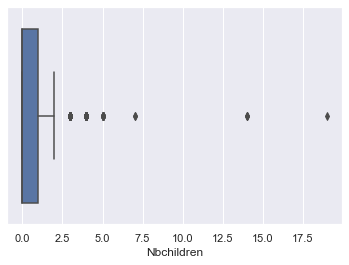

In [46]:
sns.boxplot(x=df["Nbchildren"]) ### correlated with number of family_member
print(df['Nbchildren'].value_counts().sort_values(ascending=False))
print()


In [47]:
number_Children_outlier = df['Nbchildren'].quantile(0.99)
df = df[df['Nbchildren'] < number_Children_outlier]

135000.0    3832
180000.0    2767
157500.0    2724
112500.0    2690
225000.0    2657
            ... 
165150.0       1
62100.0        1
236250.0       1
191700.0       1
42300.0        1
Name: Total_income_per_year, Length: 255, dtype: int64



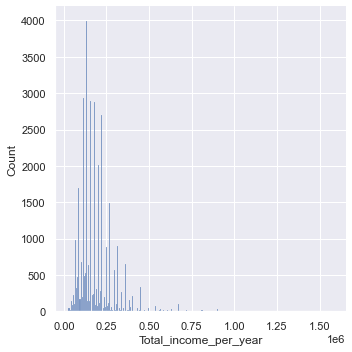

In [48]:
sns.displot(df, x="Total_income_per_year")
print(df['Total_income_per_year'].value_counts().sort_values(ascending=False))
print()

In [49]:
Total_income_per_year_outlier = df['Total_income_per_year'].quantile(0.99)
df = df[df['Total_income_per_year'] < Total_income_per_year_outlier]

2.0    17612
1.0     6314
3.0     5621
4.0     2779
Name: Nbfamily_member, dtype: int64


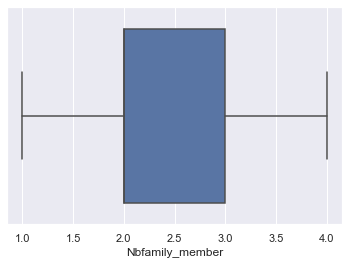

In [50]:
sns.boxplot(x=df["Nbfamily_member"])
print(df['Nbfamily_member'].value_counts().sort_values(ascending=False))

### might have high correlation with Number of children

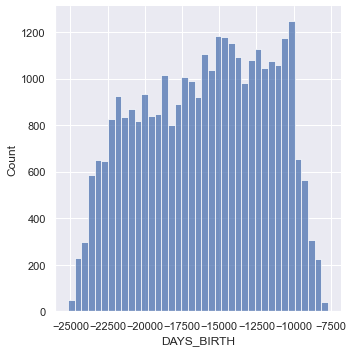

In [51]:
sns.displot(df,x='DAYS_BIRTH')


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

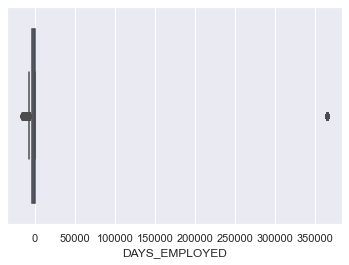

In [52]:
sns.boxplot(x=df['DAYS_EMPLOYED'])


In [53]:
df['DAYS_BIRTH']

0       -12005
1       -12005
2       -21474
3       -19110
4       -19110
         ...  
33105   -10808
33106   -10808
33107   -10808
33108   -10808
33109   -19398
Name: DAYS_BIRTH, Length: 32326, dtype: int64

In [54]:
## DEALING WITH NUMERICAL COLUMNS
def Categorical_countplot(features):
    for categorical_columns in features:
        plt.figure(figsize=(12, 12))
        ax=sns.countplot(y=df[categorical_columns], hue='Gender' , data=df)
        plt.legend(loc='best')
        total = len(df[categorical_columns])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [55]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'STATUS'],
      dtype='object')


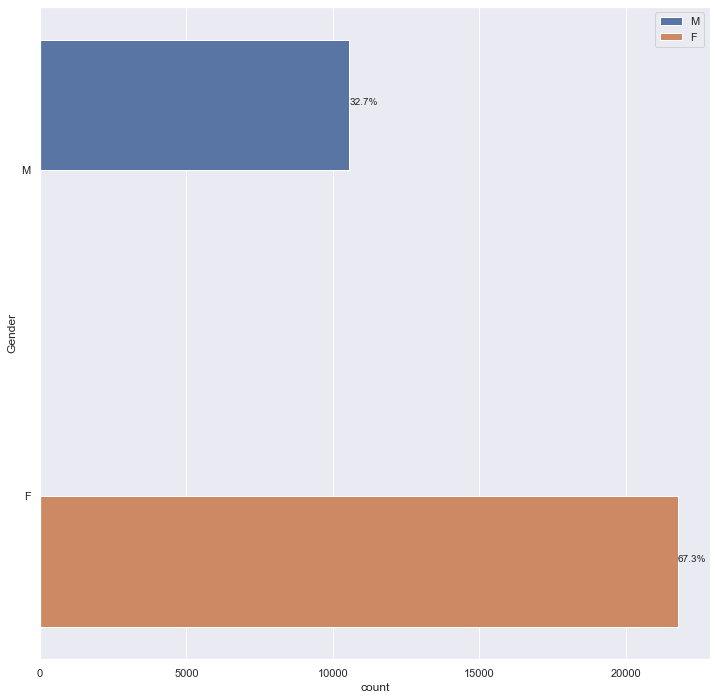

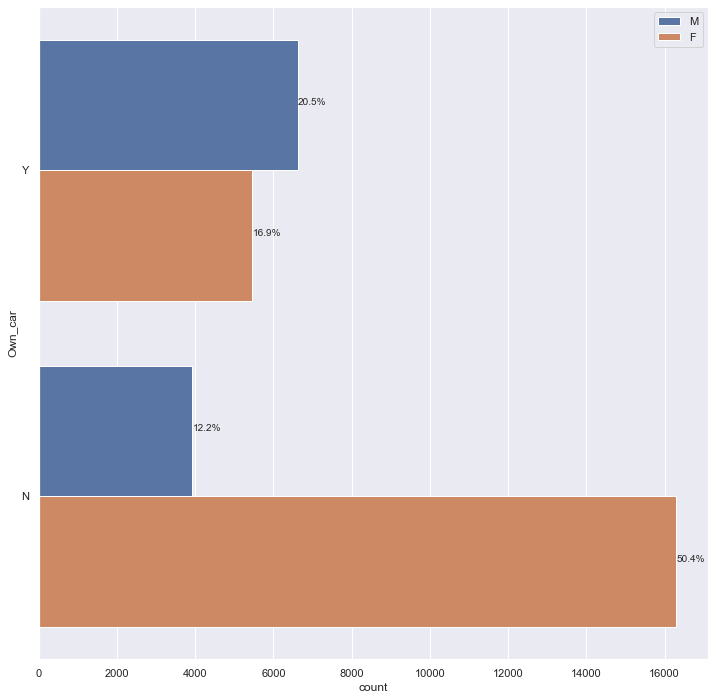

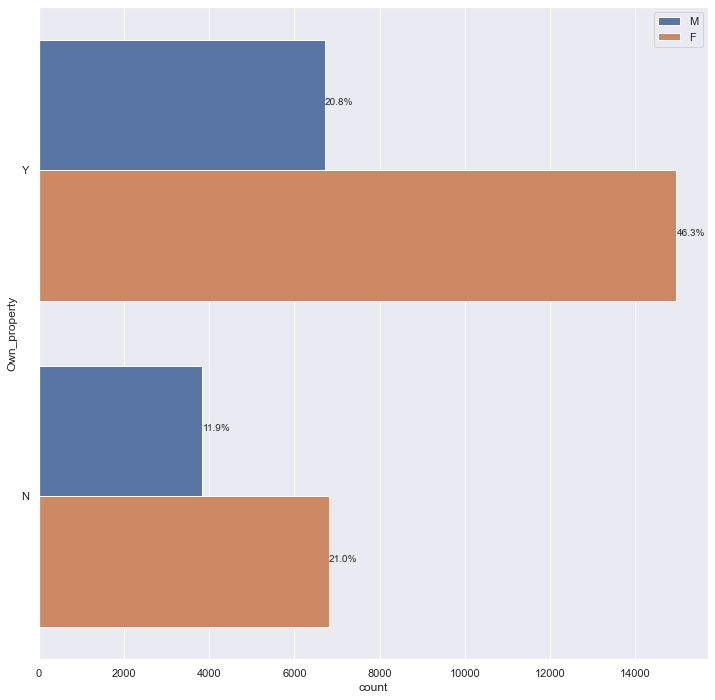

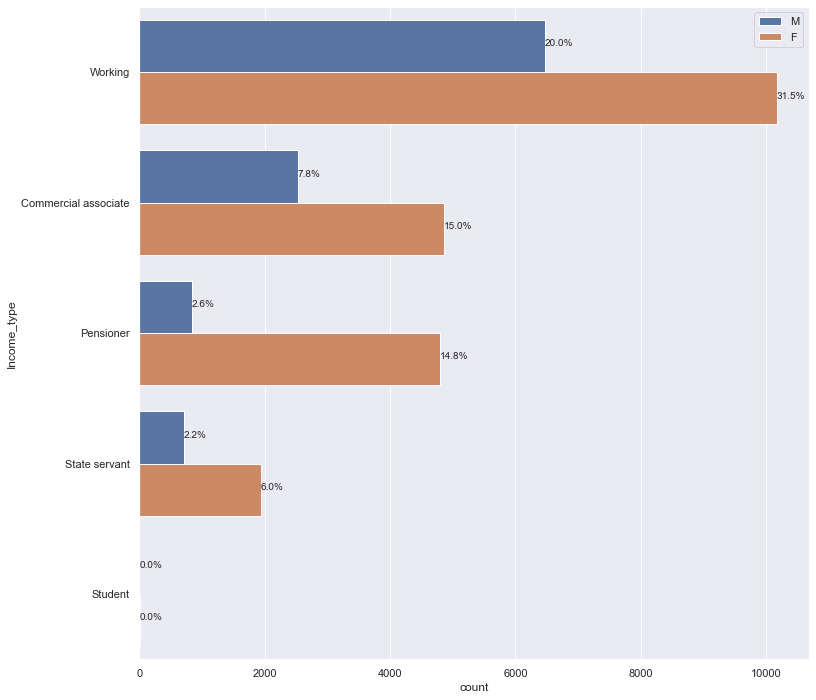

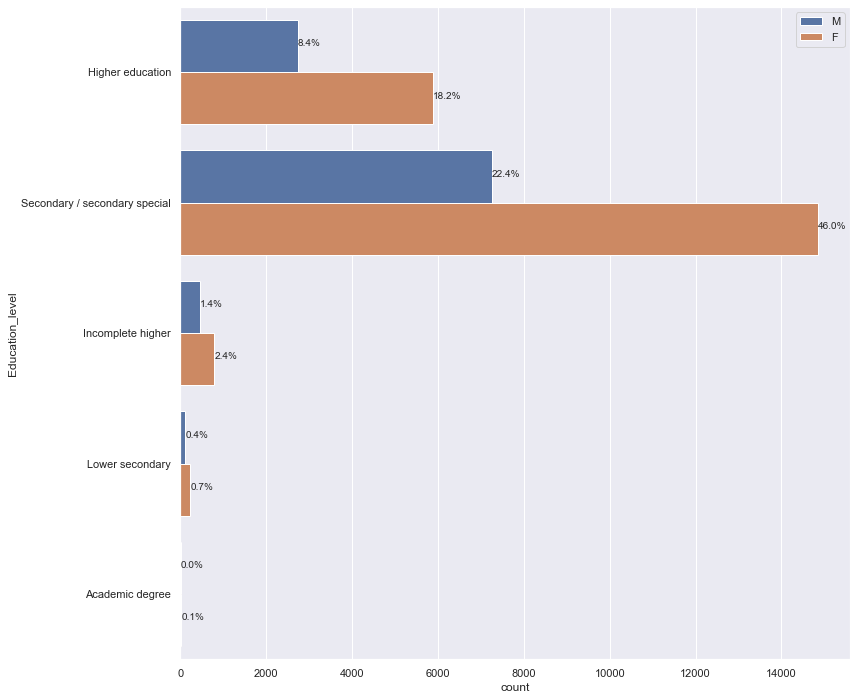

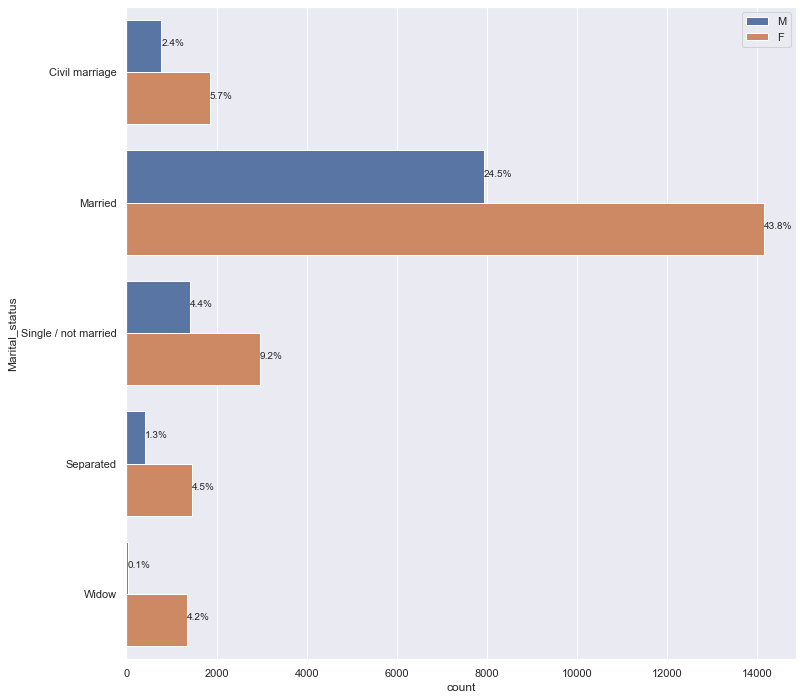

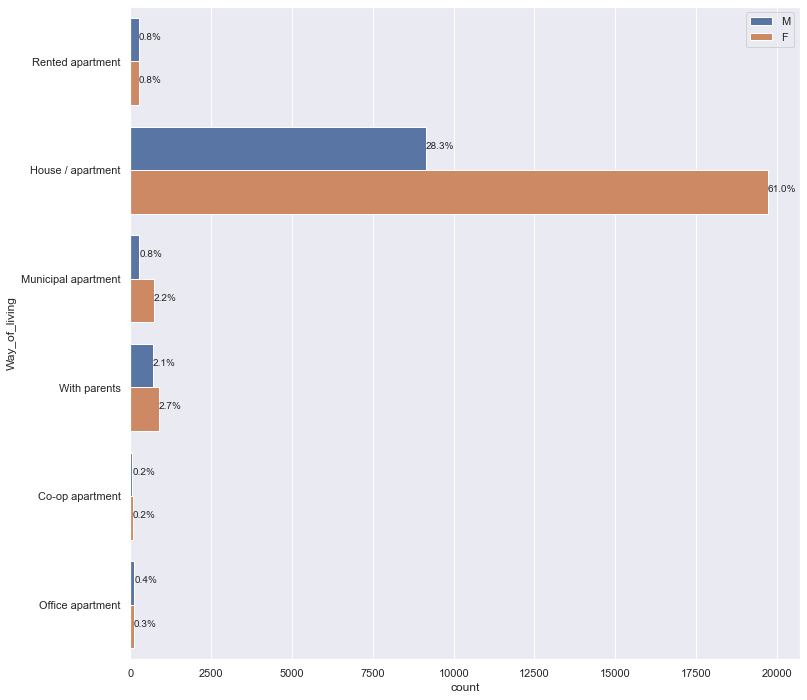

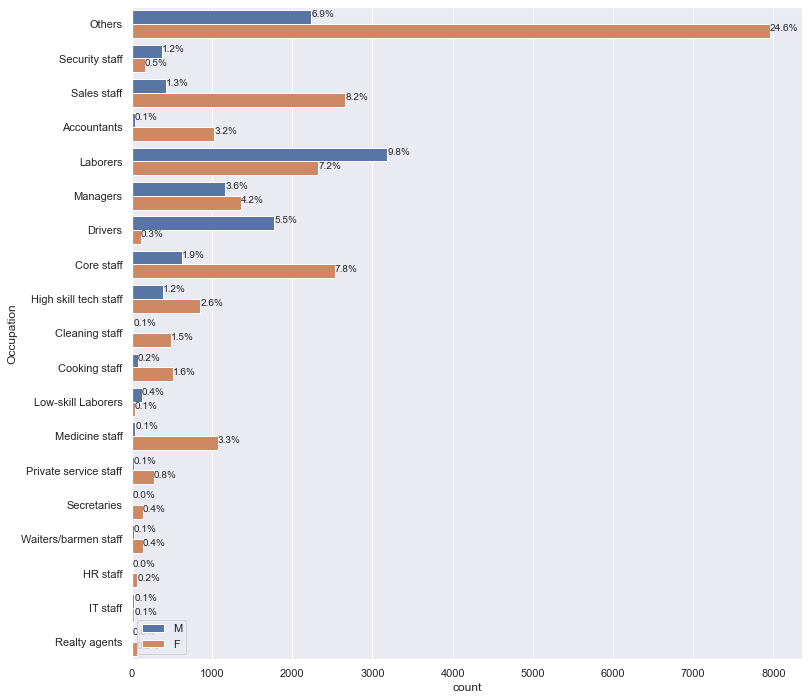

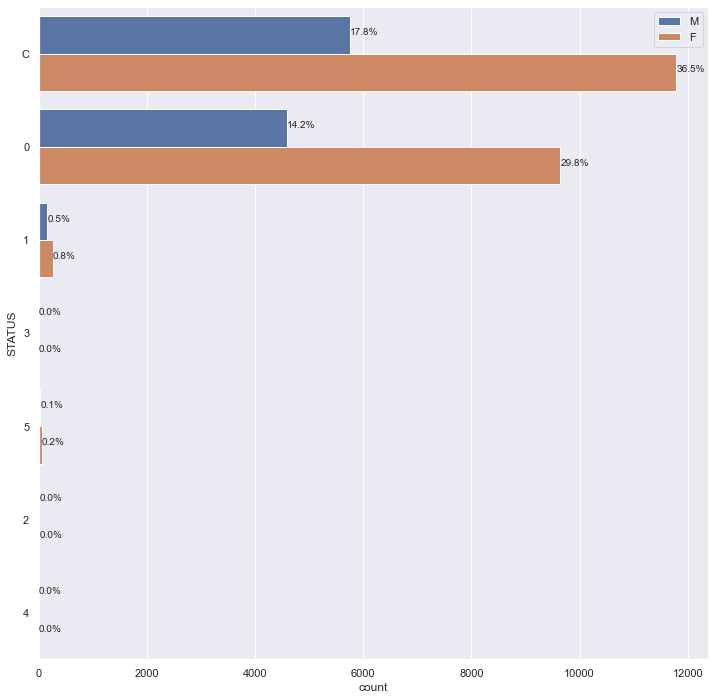

In [56]:
Categorical_countplot(['Gender','Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'STATUS'])

### Feature engineering

In [57]:
### Feature engineering


In [58]:
def convert_day_to_year(days):
    days = round(days/-365,0)
    return days

In [59]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,DAYS_BIRTH,DAYS_EMPLOYED,Workphone,Phone,Email,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,5150480,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-24,C
33106,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,-11,C
33107,5150484,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,0,C
33108,5150485,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0,0,0


In [60]:
df['Age'] = df['DAYS_BIRTH'].apply(convert_day_to_year)
df['Age'] = df['Age'].astype(int)
df['Experience'] = df['DAYS_EMPLOYED'].apply(convert_day_to_year)
df['Total_income_lifetime_employed'] = df['Experience'] * df['Total_income_per_year']
df['Working_year_proportion'] = df['Experience'] / df['Age']

df.drop('DAYS_BIRTH',axis=1,inplace=True)
df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

<AxesSubplot:>

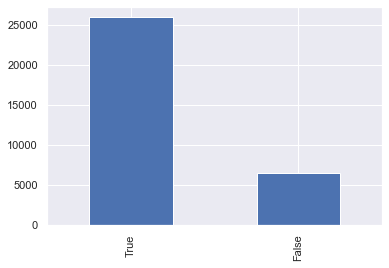

In [61]:
(df['Experience'] > 0).value_counts().plot(kind="bar")
### True is number of people who unemployment

In [62]:
def employment_status(date):
    # Determine the employment status based on the duration
    if date < 0:
        return "Unemployed"
    else:
        return "Employment"

In [63]:
df['Employment_status'] = df['Experience'].apply(employment_status)

<AxesSubplot:ylabel='Employment_status'>

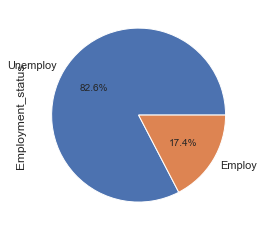

In [64]:
df['Employment_status'].value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Unemploy","Employ"])
## 82.6 percent of people are unemployed while only 17.4 percent are employed

In [65]:
df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

In [66]:
def Risk_evaluation(score):
    risk_range = [2,3,4,5]
    if score in risk_range:
        return '1'
    else:
        return '0'


## 1 risk 0 No 

0    0.99635
1    0.00365
Name: Risk, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


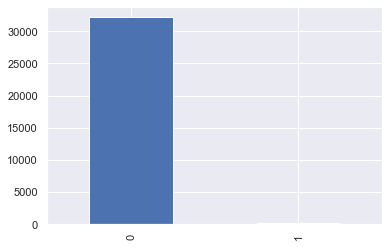

In [67]:
df['Risk'] = df['STATUS'].apply(Risk_evaluation)
print(df['Risk'].value_counts(normalize=True))
print(df['Risk'].value_counts().plot(kind='bar'))
## Imbalance dataset


### DATA VISUALIZING

In [68]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,...,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS,Age,Experience,Total_income_lifetime_employed,Working_year_proportion,Employment_status,Risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2.0,0,6,33,12.0,5130000.0,0.363636,Employment,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2.0,0,6,33,12.0,5130000.0,0.363636,Employment,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2.0,0,6,59,3.0,337500.0,0.050847,Employment,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,0,0,52,8.0,2160000.0,0.153846,Employment,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,0,6,52,8.0,2160000.0,0.153846,Employment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,5150480,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,Core staff,3.0,-24,6,30,5.0,787500.0,0.166667,Employment,0
33106,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,Core staff,3.0,-11,6,30,5.0,787500.0,0.166667,Employment,0
33107,5150484,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,Core staff,3.0,0,6,30,5.0,787500.0,0.166667,Employment,0
33108,5150485,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,Core staff,3.0,0,0,30,5.0,787500.0,0.166667,Employment,0


In [69]:
columns = df.columns
columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Nbchildren',
       'Total_income_per_year', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age',
       'Experience', 'Total_income_lifetime_employed',
       'Working_year_proportion', 'Employment_status', 'Risk'],
      dtype='object')

In [70]:
### drop unnecessary columns
df = df.drop(columns=['ID'])

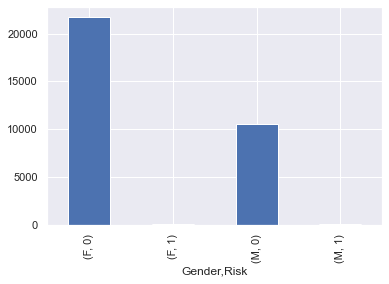

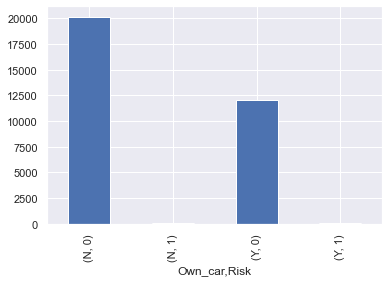

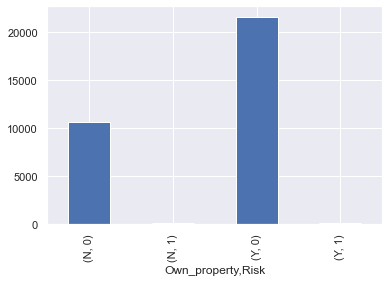

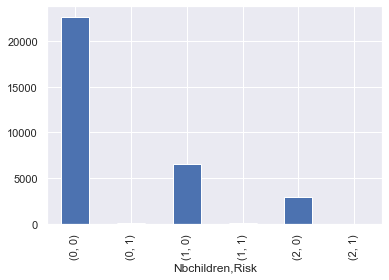

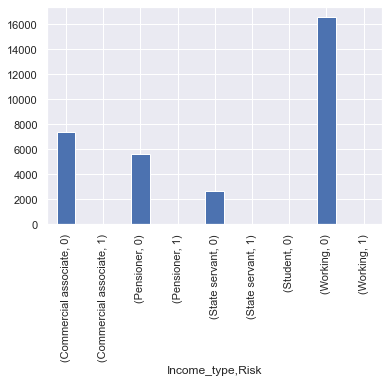

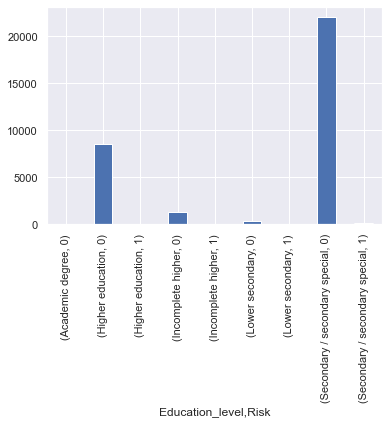

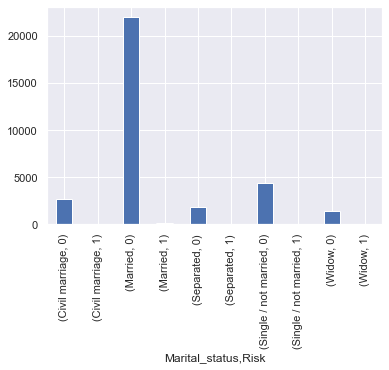

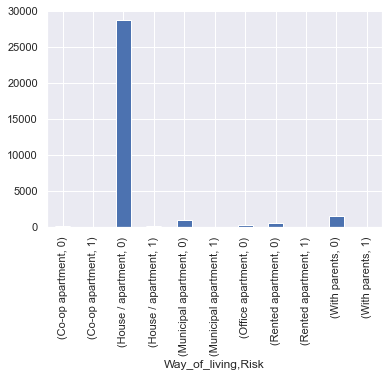

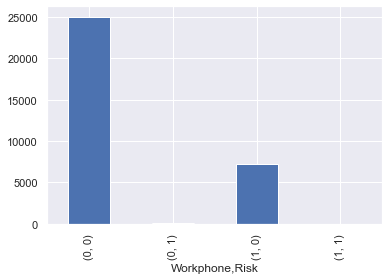

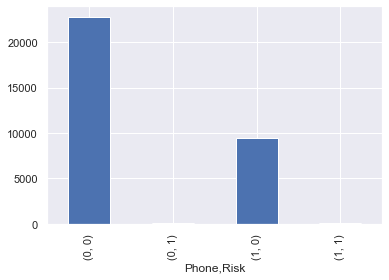

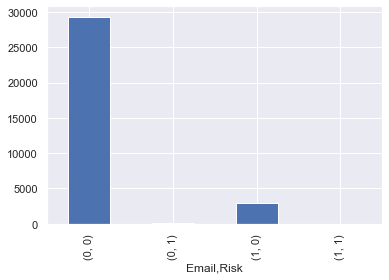

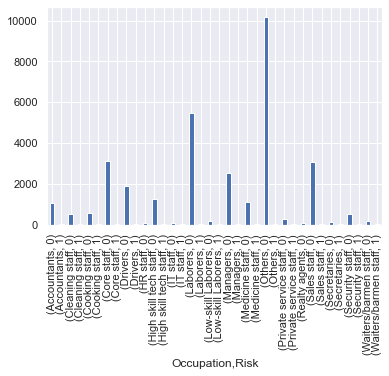

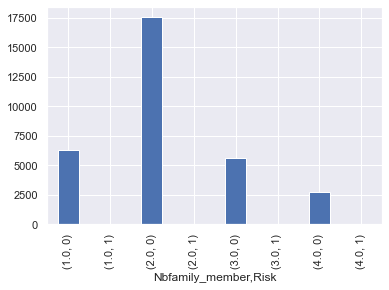

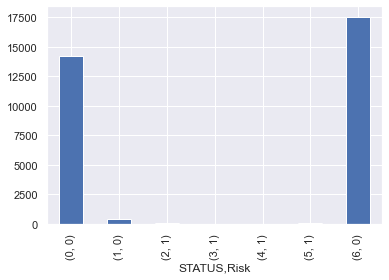

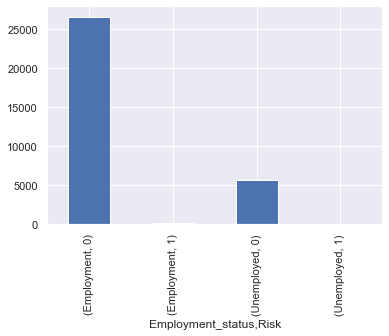

In [71]:
column = ['Gender', 'Own_car', 'Own_property', 'Nbchildren',
        'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'STATUS','Employment_status']
for variable in column:
    df.groupby(variable)['Risk'].value_counts().plot(kind='bar')
    plt.show()


In [72]:
df

,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,Workphone,...,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS,Age,Experience,Total_income_lifetime_employed,Working_year_proportion,Employment_status,Risk
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,Others,2.0,0,6,33,12.0,5130000.0,0.363636,Employment,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,Others,2.0,0,6,33,12.0,5130000.0,0.363636,Employment,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,Security staff,2.0,0,6,59,3.0,337500.0,0.050847,Employment,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,Sales staff,1.0,0,0,52,8.0,2160000.0,0.153846,Employment,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,Sales staff,1.0,0,6,52,8.0,2160000.0,0.153846,Employment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,Core staff,3.0,-24,6,30,5.0,787500.0,0.166667,Employment,0
33106,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,Core staff,3.0,-11,6,30,5.0,787500.0,0.166667,Employment,0
33107,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,Core staff,3.0,0,6,30,5.0,787500.0,0.166667,Employment,0
33108,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,Core staff,3.0,0,0,30,5.0,787500.0,0.166667,Employment,0


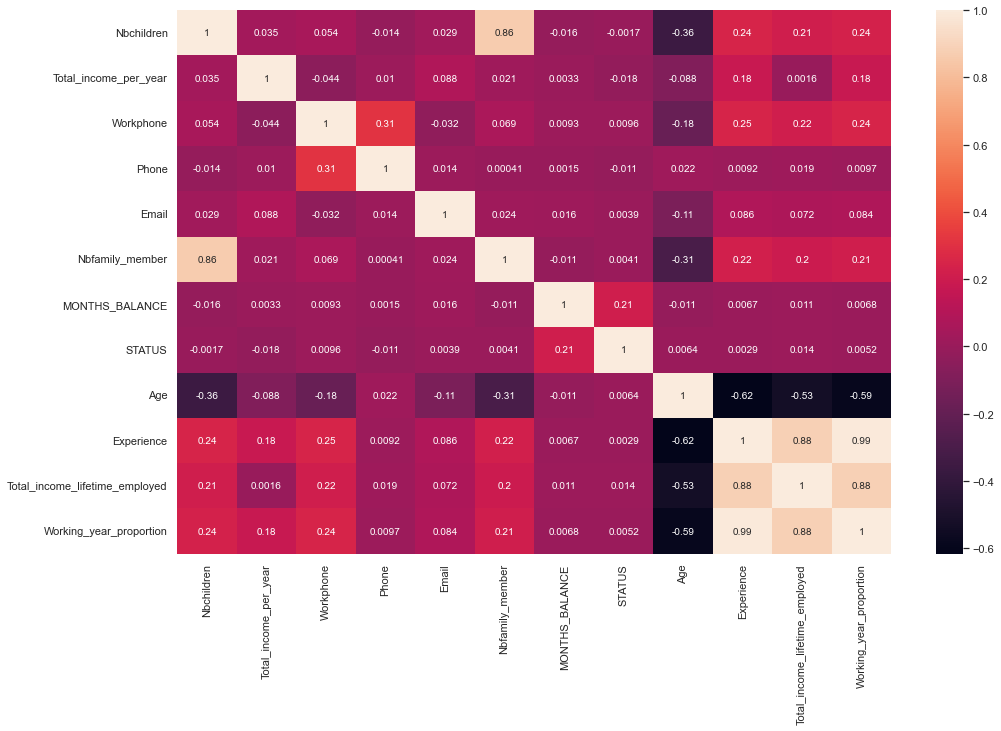

In [73]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [74]:
df.corr().columns

Index(['Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone', 'Email',
       'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age', 'Experience',
       'Total_income_lifetime_employed', 'Working_year_proportion'],
      dtype='object')

In [75]:
df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Nbchildren',
       'Total_income_per_year', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age',
       'Experience', 'Total_income_lifetime_employed',
       'Working_year_proportion', 'Employment_status', 'Risk'],
      dtype='object')

In [76]:
### checking multicollinearity VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
variables_con = df[['Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone', 'Email',
       'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age', 'Experience',
       'Total_income_lifetime_employed','Working_year_proportion']]
vif_con = pd.DataFrame()

In [77]:
vif_con["VIF"] = [variance_inflation_factor(variables_con.values, i) for i in range(variables_con.shape[1])]
vif_con["features"] = variables_con.columns

In [78]:
vif_con

### In case of using logistic regression cut

,VIF,features
0,5.004394,Nbchildren
1,6.016215,Total_income_per_year
2,1.530060,Workphone
3,1.583374,Phone
4,1.115962,Email
5,20.950077,Nbfamily_member
6,1.359965,MONTHS_BALANCE
7,2.266540,STATUS
8,15.709534,Age
9,78.395946,Experience


### DATA PREPROCESSING

In [79]:
df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Nbchildren',
       'Total_income_per_year', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age',
       'Experience', 'Total_income_lifetime_employed',
       'Working_year_proportion', 'Employment_status', 'Risk'],
      dtype='object')

In [80]:
df['Risk'] = df['Risk'].astype('int')

In [81]:
X = df.drop(['Risk'],axis=1)
y = df['Risk']

In [82]:
X

,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,Workphone,...,Email,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS,Age,Experience,Total_income_lifetime_employed,Working_year_proportion,Employment_status
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,0,Others,2.0,0,6,33,12.0,5130000.0,0.363636,Employment
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,0,Others,2.0,0,6,33,12.0,5130000.0,0.363636,Employment
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,0,Security staff,2.0,0,6,59,3.0,337500.0,0.050847,Employment
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,1,Sales staff,1.0,0,0,52,8.0,2160000.0,0.153846,Employment
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,1,Sales staff,1.0,0,6,52,8.0,2160000.0,0.153846,Employment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,0,Core staff,3.0,-24,6,30,5.0,787500.0,0.166667,Employment
33106,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,0,Core staff,3.0,-11,6,30,5.0,787500.0,0.166667,Employment
33107,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,0,Core staff,3.0,0,6,30,5.0,787500.0,0.166667,Employment
33108,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,0,Core staff,3.0,0,0,30,5.0,787500.0,0.166667,Employment


In [83]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

In [86]:
from sklearn.feature_extraction import DictVectorizer
encoded = DictVectorizer(sparse=False)
x_train_1_dict = encoded.fit_transform(x_train.to_dict('records'))
print(x_train_1_dict.shape)
print(x_train_1_dict)
### fit_transform only x_train & transform x_test

(22628, 60)
[[35.          0.          0.         ...  0.          0.28571429
   0.        ]
 [51.          0.          0.         ...  0.          0.
   0.        ]
 [26.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [58.          0.          0.         ...  0.          0.27586207
   0.        ]
 [48.          0.          0.         ...  0.          0.10416667
   1.        ]
 [46.          0.          1.         ...  0.          0.17391304
   1.        ]]


In [87]:

x_test_1_dict = encoded.transform(x_test.to_dict('records'))
print(x_test_1_dict.shape)
print(x_test_1_dict)
### fit_transform only x_train & transform x_test

(9698, 60)
[[ 3.40000000e+01  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   2.94117647e-02  0.00000000e+00]
 [ 5.80000000e+01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.72586207e+01  0.00000000e+00]
 [ 4.00000000e+01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.75000000e-01  1.00000000e+00]
 ...
 [ 4.10000000e+01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.46341463e-01  0.00000000e+00]
 [ 6.40000000e+01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.56406250e+01  0.00000000e+00]
 [ 3.90000000e+01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   5.12820513e-01  1.00000000e+00]]


In [101]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_balanced, y_train_balanced = oversample.fit_resample(x_train_1_dict, y_train)
x_test_balanced, y_test_balanced  = oversample.fit_resample(x_test_1_dict, y_test)

In [116]:
# data standarization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_balanced)
x_test_scaled = scaler.fit_transform(x_test_balanced)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score

Logit = LogisticRegression()
Logit.fit(x_train_scaled, y_train_balanced)

print('Logistic Model Accuracy : ', Logit.score(x_test_scaled, y_test_balanced)*100, '%')

prediction = Logit.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_balanced, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_balanced, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test_balanced,prediction))

Logistic Model Accuracy :  55.0450170754424 %

Confusion matrix :
[[3696 5967]
 [2721 6942]]

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.38      0.46      9663
           1       0.54      0.72      0.62      9663

    accuracy                           0.55     19326
   macro avg       0.56      0.55      0.54     19326
weighted avg       0.56      0.55      0.54     19326

\ROC_AUC_SCORE report:
0.5504501707544242


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_scaled, y_train_balanced)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_scaled, y_test_balanced)*100, '%')

prediction = decision_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_balanced, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_balanced, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test_balanced,prediction))

Decision Tree Model Accuracy :  100.0 %

Confusion matrix :
[[9663    0]
 [   0 9663]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9663
           1       1.00      1.00      1.00      9663

    accuracy                           1.00     19326
   macro avg       1.00      1.00      1.00     19326
weighted avg       1.00      1.00      1.00     19326

\ROC_AUC_SCORE report:
1.0


In [120]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train_scaled, y_train_balanced)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_scaled, y_test_balanced)*100, '%')

prediction = svc_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_balanced, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_balanced, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test_balanced,prediction))

Support Vector Classifier Accuracy :  83.93873538238643 %

Confusion matrix :
[[9509  154]
 [2950 6713]]

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      9663
           1       0.98      0.69      0.81      9663

    accuracy                           0.84     19326
   macro avg       0.87      0.84      0.84     19326
weighted avg       0.87      0.84      0.84     19326

\ROC_AUC_SCORE report:
0.8393873538238642


In [123]:
from sklearn.ensemble import RandomForestClassifier

Random_model  = RandomForestClassifier(max_depth=12,min_samples_leaf=16)

Random_model.fit(x_train_scaled, y_train_balanced)

print('Decision Tree Model Accuracy : ', Random_model.score(x_test_scaled, y_test_balanced)*100, '%')

prediction = Random_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_balanced, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_balanced, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test_balanced,prediction))

Decision Tree Model Accuracy :  70.94070164545172 %

Confusion matrix :
[[4047 5616]
 [   0 9663]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59      9663
           1       0.63      1.00      0.77      9663

    accuracy                           0.71     19326
   macro avg       0.82      0.71      0.68     19326
weighted avg       0.82      0.71      0.68     19326

\ROC_AUC_SCORE report:
0.7094070164545172


In [129]:
from lightgbm import LGBMClassifier
LGBM_model  = LGBMClassifier()

LGBM_model.fit(x_train_scaled, y_train_balanced)

print('Light GBM Model Accuracy : ', LGBM_model.score(x_test_scaled, y_test_balanced)*100, '%')

prediction = LGBM_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_balanced, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_balanced, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test_balanced,prediction))

Light GBM Model Accuracy :  100.0 %

Confusion matrix :
[[9663    0]
 [   0 9663]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9663
           1       1.00      1.00      1.00      9663

    accuracy                           1.00     19326
   macro avg       1.00      1.00      1.00     19326
weighted avg       1.00      1.00      1.00     19326

\ROC_AUC_SCORE report:
1.0


In [132]:
from xgboost import XGBClassifier
XGB_model  =XGBClassifier()

XGB_model.fit(x_train_scaled, y_train_balanced)

print('Xg Boosy Model Accuracy : ', XGB_model.score(x_test_scaled, y_test_balanced)*100, '%')

prediction = XGB_model.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_balanced, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_balanced, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test_balanced,prediction))

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:32:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xg Boosy Model Accuracy :  100.0 %

Confusion matrix :
[[9663    0]
 [   0 9663]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9663
           1       1.00      1.00      1.00      9663

    accuracy                           1.00     19326
   macro avg       1.00      1.00      1.00     19326
weighted avg       1.00      1.00      1.00     19326

\ROC_AUC_SCORE report:
1.0


In [133]:
from sklearn.model_selection import GridSearchCV